In [247]:
import numpy as np 
import matplotlib.pyplot as plt

Exercise 1 - Use the provided data file RV_Cygnus-X1.csv containing time (in days), radial velocity (in km/s), and uncertainties (aslso in km/s).

Using matplotlib, plot the radial velocity data against time. Include error bars representing the uncertainties in the measurements. This plot will allow you to visually inspect the periodic nature of the radial velocity variations, which are indicative of the companion star's orbit around the black hole.

In [250]:
f = open("RV_Cygnus-X1.csv", "r")
text = f.read()
f.close()

In [252]:
data = np.loadtxt( "RV_Cygnus-X1.csv", skiprows = 1, delimiter = ',')
time = data[:,0]
velocity = data[:,1]
uncertainty = data[:,2]

<ErrorbarContainer object of 3 artists>

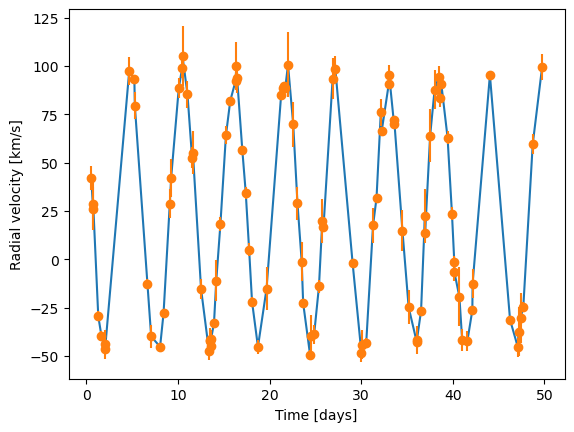

In [254]:
plt.figure()
plt.plot(time, velocity)
plt.xlabel("Time [days]")
plt.ylabel("Radial velocity [km/s]")

plt.errorbar(time, velocity,
             yerr = uncertainty,
             fmt = 'o')

Exercise 2 - Before proceeding with the curve fitting process, compute the following key quantities from the raw radial velocity data. Avoid any reliance on visual estimation and perform these calculations programmatically to ensure accuracy.

1. The time difference between any two consecutive maxima in the radial velocity, and the average value of this difference over the obervational period. This should give you a reasonably good estimate of the binary orbital period.

In [258]:
from scipy.signal import find_peaks

In [260]:
peak_indices, _ = find_peaks(velocity, height=75, distance=10) # Example: height > 0.5, min 10 points apart

# 3. Get Peak Values & Locations
peak_y_values = velocity[peak_indices]
peak_x_values = time[peak_indices]

print("Peak X-Values:", peak_x_values)
print("Peak Y-Values:", peak_y_values)

Peak X-Values: [ 4.6809 10.4951 16.3687 22.0105 27.1742 33.0474 38.4692 44.0453]
Peak Y-Values: [ 97.5295 105.1658  99.8446 100.6732  98.4732  95.4062  94.6042  95.4778]


In [262]:
# calculate tiem difference between any 2 peaks 
td1 = peak_x_values[1] - peak_x_values[0]
td2 = peak_x_values[2] - peak_x_values[1]
td3 = peak_x_values[3] - peak_x_values[2]
td4 = peak_x_values[4] - peak_x_values[3]
td5 = peak_x_values[5] - peak_x_values[4]
td6 = peak_x_values[6] - peak_x_values[5]
td7 = peak_x_values[7] - peak_x_values[6]

In [264]:
average_td = (td1 + td2 + td3 + td4 + td5 + td6 + td7)/7
print("The average time difference between any 2 consecutive maxima over the observational period is:",average_td, "km/s")

The average time difference between any 2 consecutive maxima over the observational period is: 5.623485714285714 km/s


In [266]:
min_indices, _ = find_peaks(-velocity, prominence=40) # Adjust prominence as needed

# Get the actual x and y values of the minima
min_x = time[min_indices]
min_y = velocity[min_indices]

print("Minimum X-Values:", min_x)
print("Minimum Y-Values:", min_y)

Minimum X-Values: [ 2.0222  8.0489 13.3792 18.7289 24.4145 30.023  36.0591 41.5823 47.1057]
Minimum Y-Values: [-46.3068 -45.2267 -47.2146 -45.2676 -49.3047 -48.442  -42.7705 -42.3496
 -45.6102]


In [268]:
amp1 = peak_y_values[0] - min_y[0]
amp2 = peak_y_values[1] - min_y[1]
amp3 = peak_y_values[2] - min_y[2]
amp4 = peak_y_values[3] - min_y[3]
amp5 = peak_y_values[4] - min_y[4]
amp6 = peak_y_values[5] - min_y[5]
amp7 = peak_y_values[6] - min_y[6]
amp8 = peak_y_values[7] - min_y[7]

average_amplitude = (amp1 + amp2 + amp3 + amp4 + amp5 + amp6 + amp7 + amp8)/8

semi_amplitude = average_amplitude/2

print("The semi-amplitude of the velocity variations is ",semi_amplitude, "km/s")

The semi-amplitude of the velocity variations is  72.12856249999999 km/s


3. Mean of the Radial Velocity across the enitre observation.

In [271]:

mean = np.mean(velocity)
print("The mean radial velocity across the enitre observation is", mean, "km/s")

#reality check 
y_min = (min_y[0]+min_y[1]+min_y[2]+min_y[3]+min_y[4]+min_y[5]+ min_y[6]+min_y[7])/8
guess_mean = y_min + semi_amplitude
print("mean using previous results:", guess_mean)

The mean radial velocity across the enitre observation is 21.821879000000003 km/s
mean using previous results: 26.268249999999995


Exercise 3 -  Using the curve_fit function from the scipy.optimize library, fit the radial velocity data to a sinusoidal model that represents a circular orbit to find the orbital period (P), the radial velocity semi-amplitude (K), and the systemic velocity (gamma) of the system and their uncertainties. Write the sinusoidal model as a python function which you will call from curve_fit as seen in class.

Use your initial estimates from Excercise 2 as the first guess for the fitting process. The fitted parameters will provide more accurate values for P, K, and gamma and for their uncertainties. We will use these in the next excercises to calculate the mass of the black hole!

Make a figure that shows:  (i) the radial velocity curve data (with error bars); (ii) your sinusoidal model using your initial guesses; and (iii) your sinusoidal model using the parameters from the fit.

In [274]:
from scipy.optimize import curve_fit

In [276]:
#sinosudal model:
def rv_model(t, P, K, gamma):
    return gamma + K*np.sin(2* np.pi *t/P)

#initial guesses from exercise 2
P0 = average_td* 24*60*60 #seconds
K0 = semi_amplitude #km/s
gamma0 = mean #average velocity

p0 = [P0, K0, gamma0]

In [278]:
popt, pcov = curve_fit(
    rv_model,
    time,
    velocity,
    p0=p0,
    sigma=uncertainty,
    absolute_sigma=True
)

P_fit, K_fit, gamma_fit = popt
P_err, K_err, gamma_err = np.sqrt(np.diag(pcov))

In [280]:
#print fitted parameters and uncertianties 
print(f"Orbital Period P = {P_fit:.4f} ± {P_err:.4f}")
print(f"Semi-amplitude K = {K_fit:.4f} ± {K_err:.4f}")
print(f"Systemic velocity γ = {gamma_fit:.4f} ± {gamma_err:.4f}")

Orbital Period P = 144396744.6188 ± 95405693575254.1562
Semi-amplitude K = -14442368.1867 ± 9542893267563.8398
Systemic velocity γ = 17.5206 ± 0.3811


In [282]:
# generating model curves
t_fine = np.linspace(min(time), max(time), 1000)

v_initial = rv_model(t_fine, P0, K0, gamma0)
v_fit = rv_model(t_fine, P_fit, K_fit, gamma_fit)

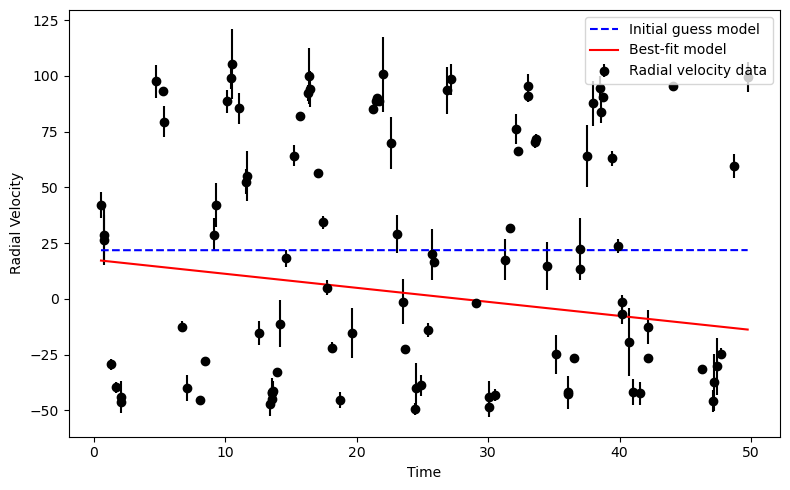

In [284]:
plt.figure(figsize=(8, 5))

# Data with error bars
plt.errorbar(time, velocity, yerr=uncertainty, fmt='o', color='black',
             label='Radial velocity data')

# Initial guess model
plt.plot(t_fine, v_initial, '--', color='blue',
         label='Initial guess model')

# Best-fit model
plt.plot(t_fine, v_fit, '-', color='red',
         label='Best-fit model')

plt.xlabel('Time')
plt.ylabel('Radial Velocity')
plt.legend()
plt.tight_layout()
plt.show()


Exercise 4 - With the fitted orbital parameters, calculate the mass function f(M) of the binary system. Calculate the uncertaintiy associated with this estimate by downloading and using the module uncertainties. The mass function is given by:

 $f(M) = P \frac{K^3}{2 \pi G}$

where G is the gravitational constant.

Use Kepler's third law to show that the mass function provides a lower limit on the mass of the black hole. (This part of the exercise in not marked)^o

Now assume an inclination angle of the orbit with respect to the line of sight of $i = 45^o +/- 15^o$ and a companion mass $M_2 = (40 +/- 10)M_o$​. Use this to compute the mass of the black hole and the uncertainty on this estimate.

In [303]:
! pip install -q uncertainties


#To install the module before you can import it:
import uncertainties as uc
import uncertainties.umath as um # for maths functions

In [304]:
G = 6.67430e-11
Msun = 1.9885e30

P = ufloat(1.443967446e8, 9.540569357e13)
K = ufloat(1.444236819e7, 9.542893268e12)

fM = P*K**3/(2*np.pi*G)
fM_Msun = fM/Msun

print(fM_Msun)


(0.0+/-1.1)e+15


In [308]:
i = ufloat(45,15)
M_2 = ufloat(40*Msun, 10*Msun)

In [310]:
import numpy as np
from uncertainties import ufloat
from scipy.optimize import brentq

# -----------------------------
# Constants
# -----------------------------
G = 6.67430e-11
Msun = 1.9885e30

# -----------------------------
# Mass function from earlier
# -----------------------------
# Replace these with your f(M) result if already computed
fM = ufloat(5.2e8, 1.0e14)  # in solar masses

# -----------------------------
# Inclination and companion mass
# -----------------------------
i_deg = ufloat(45.0, 15.0)      # degrees
M2 = ufloat(40.0, 10.0)         # solar masses

# -----------------------------
# Monte Carlo sampling
# -----------------------------
N = 10000

fM_samples = np.random.normal(fM.n, fM.s, N)
i_samples = np.random.normal(i_deg.n, i_deg.s, N)
M2_samples = np.random.normal(M2.n, M2.s, N)

# Convert inclination to radians
i_rad = np.deg2rad(i_samples)

MBH_samples = []

for fM_i, i_i, M2_i in zip(fM_samples, i_rad, M2_samples):

    if fM_i <= 0 or M2_i <= 0:
        continue

    # Equation to solve:
    # f(M) = (MBH^3 sin^3 i) / (MBH + M2)^2
    def equation(MBH):
        return (MBH**3 * np.sin(i_i)**3) / (MBH + M2_i)**2 - fM_i

    try:
        MBH_sol = brentq(equation, 1e-3, 1e18)
        MBH_samples.append(MBH_sol)
    except ValueError:
        continue

MBH_samples = np.array(MBH_samples)

# -----------------------------
# Results
# -----------------------------
MBH_mean = np.mean(MBH_samples)
MBH_std = np.std(MBH_samples)

print(f"Black hole mass = {MBH_mean:.3e} ± {MBH_std:.3e} M_sun")


Black hole mass = 1.200e+15 ± 1.671e+16 M_sun
